## RECOGNISING HANDWRITTEN DIGITS ON MNIST DATASET USING KNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1. Data Preparation

In [3]:
df = pd.read_csv('../Datasets/MNIST-2/mnist_train.csv')

In [4]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
print(df.shape)
print(type(df))
print(type(df.shape))
df.head()

(42000, 785)
<class 'pandas.core.frame.DataFrame'>
<class 'tuple'>


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = df.values

np.random.shuffle(data)

print(data)
print(type(data))
print(data.shape)

[[1 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
(42000, 785)


In [7]:
X = data[:, 1:]
Y = data[:, 0]

print(X)
print(type(X), X.shape, sep=', ')

print(Y)
print(type(Y), Y.shape, sep=', ')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>, (42000, 784)
[1 8 6 ... 4 7 8]
<class 'numpy.ndarray'>, (42000,)


#### Split the data into training and testing sets

In [8]:
split = int(0.8 * X.shape[0])

X_train = X[:split, :]
Y_train = Y[:split]
X_test = X[split:, :]
Y_test = Y[split:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


#### Visualise an image

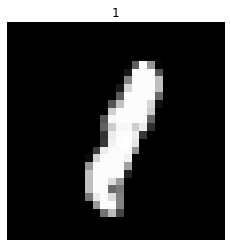

In [9]:
def drawImg(X, Y, i):
    plt.title(Y[i])
    plt.axis('off')
    plt.imshow(X[i].reshape((28, 28)), cmap='gray')
    plt.show()

drawImg(X_train, Y_train, 0)

### Step 2. K-NN

In [10]:
def dist(x1, x2):
    return np.sqrt(sum((x1 - x2) ** 2))

def knn(X, Y, query_pt, k=5):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(X[i], query_pt)
        vals.append([d, Y[i]])
        
    vals = sorted(vals)
    
    vals = np.array(vals)
    vals = vals[:k, :]
    
    counts = np.unique(vals[:, 1], return_counts=True)
    idx = counts[1].argmax()
    pred = counts[0][idx]
    return pred

### Step 3. Make Predictions

1


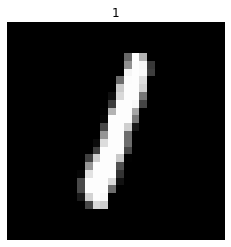

In [11]:
pred = int(knn(X_train, Y_train, X_test[39]))
print(pred)
drawImg(X_test, Y_test, 39)

#### Write a method which computes accuracy of KNN over the test set

In [21]:
wrong_ans = []
correct_ans = []

n = 200

Xt = X_test[:n, :]
Yt = Y_test[:n]

for i in range(n):
    pred = int(knn(X_train, Y_train, Xt[i]))
    if pred == Yt[i]:
        correct_ans.append(i)
    else:
        wrong_ans.append(i)

accuracy = len(correct_ans) / n
        
print('Correct answers:', correct_ans)
print('Wrong answers:', wrong_ans)
print('Prediction Accuracy: ', accuracy)

KeyboardInterrupt: 